In [2]:
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# CDR(Clinical dementia rating)
Based on Memory, 
Orientation, 
Judgment and problem sloving, 
Community affairs, 
Home and hobby, 
Personal care, 


In [3]:
FolderName = glob.glob('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/Cognitive_Test_Battery_LEMON/*')
CogTestBatName = [item.split('/')[-1] if item.split('/')[-1][-1] != '_' else item.split('/')[-1][:-1] for item in FolderName]
# CogTestBatName

CsvList = glob.glob('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/Cognitive_Test_Battery_LEMON/*/*.csv')
CogTestBat = []
for i in CsvList:
    TempPd = pd.read_csv(i)
    CogTestBat.append(TempPd)
# CogTestBat

for i,j in zip(CogTestBatName, CogTestBat):
    print(i, j)

CVLT      Unnamed: 0  CVLT_1  CVLT_2  CVLT_3  CVLT_4  CVLT_5  CVLT_6  CVLT_7  \
0    sub-032311       1       7    16.0   1.075   0.226    60.0    58.0   
1    sub-032309       1       9    11.0  -1.644   1.226    53.0    51.0   
2    sub-032382       1       6    12.0  -1.286   0.672    48.0    48.0   
3    sub-032302       1       9    15.0  -1.644   0.426    63.0    60.0   
4    sub-032315       1       7    13.0   0.502   0.117    53.0    51.0   
..          ...     ...     ...     ...     ...     ...     ...     ...   
223  sub-032304       1       9     7.0  -1.071   0.608    43.0    42.0   
224  sub-032439       1       8    15.0   0.574   0.426    62.0    61.0   
225  sub-032440       1      10    16.0  -1.000   0.226    72.0    71.0   
226  sub-032441       1       6    10.0  -0.141   1.426    49.0    48.0   
227  sub-032525       1       7     7.0  -0.642   3.798    45.0    44.0   

     CVLT_8  CVLT_9  CVLT_10  CVLT_11  CVLT_12  CVLT_13  CVLT_14  CVLT_15  \
0         8      

In [4]:
CogTestBat[0].describe()

,CVLT_1,CVLT_2,CVLT_3,CVLT_4,CVLT_5,CVLT_6,CVLT_7,CVLT_8,CVLT_9,CVLT_10,CVLT_11,CVLT_12,CVLT_13,CVLT_14,CVLT_15
count,228.000000,228.000000,227.000000,228.000000,227.000000,227.00000,160.000000,228.000000,228.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,1.008772,7.425439,13.312775,-0.099680,0.287317,55.77533,57.393750,6.320175,11.956140,12.550661,12.493392,12.850220,14.951542,3.832599,3.466960
std,0.093452,1.990874,2.278014,1.082822,0.707725,9.93375,8.059603,1.986327,3.022355,2.590117,2.821175,2.638137,1.399221,4.005328,4.192546
min,1.000000,1.000000,6.000000,-3.146000,-1.546000,27.00000,33.000000,1.000000,1.000000,3.000000,3.000000,3.000000,6.000000,0.000000,0.000000
25%,1.000000,6.000000,12.000000,-0.785000,-0.091500,49.00000,52.000000,5.000000,10.000000,11.000000,11.000000,11.500000,14.500000,1.000000,0.000000
50%,1.000000,7.000000,14.000000,-0.070000,0.226000,56.00000,58.000000,6.000000,12.000000,13.000000,13.000000,13.000000,15.000000,3.000000,2.000000
75%,1.000000,9.000000,15.000000,0.574000,0.649000,63.00000,63.250000,7.250000,14.000000,15.000000,15.000000,15.000000,16.000000,6.000000,5.000000
max,2.000000,14.000000,16.000000,2.648000,3.798000,76.00000,73.000000,12.000000,16.000000,16.000000,16.000000,16.000000,16.000000,33.000000,21.000000


In [44]:
# exluse sub-032415

CogTestBat[0].iloc[30:40,:]

,Unnamed: 0,CVLT_1,CVLT_2,CVLT_3,CVLT_4,CVLT_5,CVLT_6,CVLT_7,CVLT_8,CVLT_9,CVLT_10,CVLT_11,CVLT_12,CVLT_13,CVLT_14,CVLT_15,CVLT_16
30,sub-032418,1,6,16.0,1.003,-1.546,59.0,58.0,7,11,12.0,13.0,13.0,15.0,1.0,6.0,NaN
31,sub-032326,1,10,15.0,-1.572,-0.283,63.0,62.0,6,13,13.0,15.0,15.0,16.0,2.0,1.0,NaN
32,sub-032415,1,6,NaN,-0.141,NaN,NaN,NaN,5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,sub-032332,1,8,16.0,1.146,-0.128,63.0,59.0,9,15,15.0,16.0,15.0,16.0,1.0,0.0,NaN
34,sub-032331,1,5,10.0,0.359,1.072,40.0,NaN,5,9,11.0,10.0,10.0,12.0,0.0,0.0,NaN
35,sub-032305,1,11,14.0,-0.928,0.272,68.0,NaN,8,13,14.0,13.0,14.0,15.0,14.0,9.0,NaN
36,sub-032308,1,7,14.0,-0.070,-0.437,54.0,58.0,6,11,12.0,12.0,12.0,16.0,3.0,3.0,NaN
37,sub-032428,1,8,13.0,0.002,0.117,59.0,NaN,7,11,14.0,13.0,15.0,16.0,0.0,0.0,NaN
38,sub-032333,1,5,10.0,0.359,0.008,42.0,NaN,5,6,9.0,11.0,9.0,15.0,0.0,16.0,NaN
39,sub-032430,1,8,14.0,-2.287,-0.792,46.0,NaN,3,10,12.0,11.0,12.0,15.0,4.0,1.0,NaN


In [32]:
# CVLT

df = CogTestBat[0]
df = df[df.index != 32]
df_id = df['Unnamed: 0'].tolist()
df_CVLT = df
exclude = ['CVLT_1', 'CVLT_7', 'CVLT_16']
columns = df.columns[2:-1].values
columns = [item for item in columns.tolist() if item not in exclude]
# print(columns)
CustomMin = [0, 0, -4, -4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
CustomMax = [16, 16, 4, 4, 80, 16, 16, 16, 16, 16, 16, 80, 80]
print(df[columns])
df2array = df[columns].values
MinMax = np.array([CustomMin, CustomMax])
mmscaler = MinMaxScaler(feature_range=(0, 1), copy=True)
mmscaler.fit(MinMax.astype('float'))
scaled_sample = mmscaler.transform(df2array)

print(scaled_sample)
# df['CVLT_1'].tolist()

     CVLT_2  CVLT_3  CVLT_4  CVLT_5  CVLT_6  CVLT_8  CVLT_9  CVLT_10  CVLT_11  \
0         7    16.0   1.075   0.226    60.0       8      16     14.0     16.0   
1         9    11.0  -1.644   1.226    53.0       5      11     11.0     11.0   
2         6    12.0  -1.286   0.672    48.0       3      11     12.0     12.0   
3         9    15.0  -1.644   0.426    63.0       5      15     15.0     15.0   
4         7    13.0   0.502   0.117    53.0       7      11     11.0     12.0   
..      ...     ...     ...     ...     ...     ...     ...      ...      ...   
223       9     7.0  -1.071   0.608    43.0       6       3      9.0      7.0   
224       8    15.0   0.574   0.426    62.0       8      15     14.0     14.0   
225      10    16.0  -1.000   0.226    72.0       7      16     16.0     16.0   
226       6    10.0  -0.141   1.426    49.0       5      10      9.0      8.0   
227       7     7.0  -0.642   3.798    45.0       5      12     14.0     12.0   

     CVLT_12  CVLT_13  CVLT

In [6]:
scaled_sample

array([[0.4375  , 1.      , 0.634375, ..., 1.      , 0.0125  , 0.025   ],
       [0.5625  , 0.6875  , 0.2945  , ..., 1.      , 0.1     , 0.1375  ],
       [0.375   , 0.75    , 0.33925 , ..., 1.      , 0.0125  , 0.      ],
       ...,
       [0.625   , 1.      , 0.375   , ..., 1.      , 0.0125  , 0.0125  ],
       [0.375   , 0.625   , 0.482375, ..., 0.625   , 0.1     , 0.0375  ],
       [0.4375  , 0.4375  , 0.41975 , ..., 0.9375  , 0.      , 0.025   ]])

In [7]:
pca = PCA(n_components=2, whiten=False)
pca.fit(scaled_sample)
X_pca = pca.fit_transform(scaled_sample)

In [8]:
for index, i in enumerate(X_pca.T[0]):
    print(index, df_id[index], i)

0 sub-032311 -0.3710429352392626
1 sub-032309 0.1602108717732112
2 sub-032382 0.18232595897210926
3 sub-032302 -0.29894488287337007
4 sub-032315 0.13078565731172362
5 sub-032314 -0.38834504262466096
6 sub-032316 -0.523394064824578
7 sub-032383 -0.05484433239464538
8 sub-032307 0.3560916774962621
9 sub-032310 -0.14000255290938257
10 sub-032312 0.20261606688735273
11 sub-032317 -0.049822864872388704
12 sub-032404 -0.5380997217523894
13 sub-032318 0.3695131871868305
14 sub-032319 0.02151496977880599
15 sub-032386 -0.36127518844839335
16 sub-032320 -0.5129174657522637
17 sub-032321 -0.5536433241109996
18 sub-032322 -0.2001503194346952
19 sub-032394 -0.5400043518229805
20 sub-032324 -0.49087629007200206
21 sub-032323 -0.37064693428491347
22 sub-032528 -0.25891163263957884
23 sub-032325 -0.3344146904861774
24 sub-032313 -0.06076338024618715
25 sub-032405 0.26226514790259303
26 sub-032384 -0.16322455560797347
27 sub-032407 -0.5827734209804311
28 sub-032327 -0.3817420599948942
29 sub-032414 -0

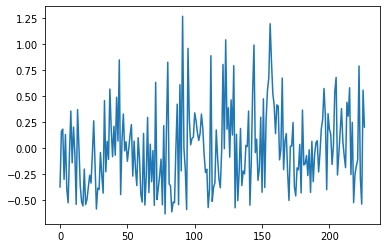

In [9]:
plt.plot(X_pca.T[0])

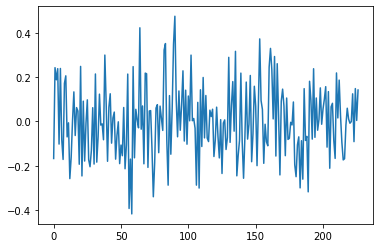

In [164]:
plt.plot(X_pca.T[1])

In [23]:
pca.explained_variance_ratio_

array([0.66597898, 0.11826223])

In [186]:
X_pca.T[0].shape

(227,)

In [12]:
# Get cognitive status

Cog_score = pd.read_csv("/workspace/brail_poc3/notebooks/Chen/TestCognitive.csv")
Cog_score = Cog_score.loc[:, ["ID", "Label"]]
Age_data = pd.read_csv("/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv")
Age_data = Age_data.loc[:, ["Subject", "Age"]]
Age_data = Age_data.rename({'Subject': 'ID'}, axis='columns')

def convert_age_range(age_range):
    # ハイフンで文字列を分割し、最初の部分を取得
    return int(age_range.split("-")[0])

Age_data["Age_1"] = Age_data["Age"].apply(convert_age_range)
Age_data.drop("Age", axis=1, inplace=True)

cog_df = Cog_score.merge(Age_data, on='ID', how='left')
ground_truth = cog_df[cog_df['Age_1'] >= 40]
Elder_group = ground_truth['ID'].tolist()

GT1 = ground_truth[ground_truth["Label"] == 1]
GT2 = ground_truth[ground_truth["Label"] == 2]

In [13]:
cog_df2 = Cog_score.merge(Age_data, on='ID', how='right')
cog_df2 = cog_df2[cog_df2.index != 32]
cog_df2 = cog_df2.reset_index(drop=True)

In [38]:
cog_df2

,ID,Label,Age_1,CVLT,CVLT_6,CVLT_bins,CVLT_9,CVLT_11
0,sub-032311,0.0,20,-0.371043,60.0,"(-0.4, -0.3]",16,16.0
1,sub-032309,2.0,20,0.160211,53.0,"(0.1, 0.2]",11,11.0
2,sub-032382,0.0,25,0.182326,48.0,"(0.1, 0.2]",11,12.0
3,sub-032302,0.0,20,-0.298945,63.0,"(-0.3, -0.2]",15,15.0
4,sub-032315,0.0,20,0.130786,53.0,"(0.1, 0.2]",11,12.0
...,...,...,...,...,...,...,...,...
222,sub-032304,1.0,25,0.786817,43.0,"(0.7, 0.8]",3,7.0
223,sub-032439,0.0,20,-0.287718,62.0,"(-0.3, -0.2]",15,14.0
224,sub-032440,0.0,25,-0.536070,72.0,"(-0.6, -0.5]",16,16.0
225,sub-032441,2.0,25,0.555243,49.0,"(0.5, 0.6]",10,8.0


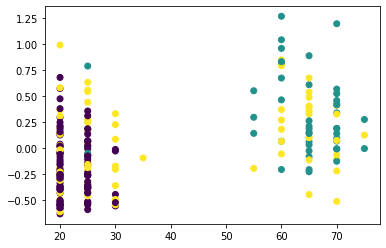

In [14]:
# 散布図

X = cog_df2['Age_1']
y = X_pca.T[0]
label = cog_df2['Label']
plt.scatter(X, y, c=label)

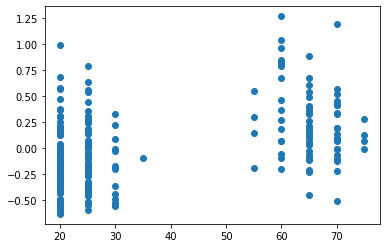

In [10]:
X = cog_df2['Age_1']
y = X_pca.T[0]
plt.scatter(X, y)

In [1]:
cog_df2

NameError: name 'cog_df2' is not defined

In [15]:
ground_truth = cog_df2[cog_df2['Age_1'] < 40]
ground_truth
under20 = [value for index, value in enumerate(X_pca.T[0]) if index in ground_truth.index.tolist()]
for index, i in enumerate(under20):
    print(index, ground_truth.iloc[index, 0], i)

0 sub-032311 -0.3710429352392626
1 sub-032309 0.1602108717732112
2 sub-032382 0.18232595897210926
3 sub-032302 -0.29894488287337007
4 sub-032315 0.13078565731172362
5 sub-032314 -0.38834504262466096
6 sub-032316 -0.523394064824578
7 sub-032307 0.3560916774962621
8 sub-032310 -0.14000255290938257
9 sub-032312 0.20261606688735273
10 sub-032317 -0.049822864872388704
11 sub-032404 -0.5380997217523894
12 sub-032319 0.02151496977880599
13 sub-032386 -0.36127518844839335
14 sub-032320 -0.5129174657522637
15 sub-032321 -0.5536433241109996
16 sub-032322 -0.2001503194346952
17 sub-032394 -0.5400043518229805
18 sub-032324 -0.49087629007200206
19 sub-032323 -0.37064693428491347
20 sub-032528 -0.25891163263957884
21 sub-032325 -0.3344146904861774
22 sub-032313 -0.06076338024618715
23 sub-032405 0.26226514790259303
24 sub-032384 -0.16322455560797347
25 sub-032407 -0.5827734209804311
26 sub-032327 -0.3817420599948942
27 sub-032414 -0.3961081441638929
28 sub-032418 -0.041304234841585075
29 sub-032326 

In [17]:
ground_truth = cog_df2[cog_df2['Age_1'] > 40]
ground_truth
over50 = [value for index, value in enumerate(X_pca.T[0]) if index in ground_truth.index.tolist()]
for index, i in enumerate(over50):
    print(index, ground_truth.iloc[index, 0], i)

0 sub-032383 -0.05484433239464538
1 sub-032318 0.3695131871868305
2 sub-032331 0.45613916268532395
3 sub-032305 -0.22577402654261727
4 sub-032308 0.06611380581031617
5 sub-032428 -0.1075703221930677
6 sub-032333 0.5661579597034846
7 sub-032430 0.18378695668887188
8 sub-032301 -0.08157124940967464
9 sub-032303 0.2100611426372309
10 sub-032336 -0.06721230110651433
11 sub-032329 0.48766649030006615
12 sub-032431 0.06800066168704529
13 sub-032335 0.8452798530287702
14 sub-032337 -0.44450462389724915
15 sub-032339 0.07184920526097374
16 sub-032306 0.32763157672381804
17 sub-032338 -0.025573459505998753
18 sub-032340 0.06158089377081024
19 sub-032341 -0.1253356936571953
20 sub-032442 -0.0069689243936093175
21 sub-032347 0.12591589532442626
22 sub-032343 0.0998261870502971
23 sub-032342 -0.09781969149784711
24 sub-032369 0.8235160041140016
25 sub-032372 0.42145366938918977
26 sub-032373 0.6075823769320712
27 sub-032443 -0.21759012178874476
28 sub-032376 1.2637191918381208
29 sub-032374 -0.003

In [37]:
cog_df2

,ID,Label,Age_1,CVLT,CVLT_6,CVLT_bins,CVLT_9,CVLT_11
0,sub-032311,0.0,20,-0.371043,60.0,"(-0.4, -0.3]",16,16.0
1,sub-032309,2.0,20,0.160211,53.0,"(0.1, 0.2]",11,11.0
2,sub-032382,0.0,25,0.182326,48.0,"(0.1, 0.2]",11,12.0
3,sub-032302,0.0,20,-0.298945,63.0,"(-0.3, -0.2]",15,15.0
4,sub-032315,0.0,20,0.130786,53.0,"(0.1, 0.2]",11,12.0
...,...,...,...,...,...,...,...,...
222,sub-032304,1.0,25,0.786817,43.0,"(0.7, 0.8]",3,7.0
223,sub-032439,0.0,20,-0.287718,62.0,"(-0.3, -0.2]",15,14.0
224,sub-032440,0.0,25,-0.536070,72.0,"(-0.6, -0.5]",16,16.0
225,sub-032441,2.0,25,0.555243,49.0,"(0.5, 0.6]",10,8.0


In [24]:
df.iloc[30:40,:]

,Unnamed: 0,CVLT_1,CVLT_2,CVLT_3,CVLT_4,CVLT_5,CVLT_6,CVLT_7,CVLT_8,CVLT_9,CVLT_10,CVLT_11,CVLT_12,CVLT_13,CVLT_14,CVLT_15,CVLT_16
30,sub-032418,1,6,16.0,1.003,-1.546,59.0,58.0,7,11,12.0,13.0,13.0,15.0,1.0,6.0,NaN
31,sub-032326,1,10,15.0,-1.572,-0.283,63.0,62.0,6,13,13.0,15.0,15.0,16.0,2.0,1.0,NaN
33,sub-032332,1,8,16.0,1.146,-0.128,63.0,59.0,9,15,15.0,16.0,15.0,16.0,1.0,0.0,NaN
34,sub-032331,1,5,10.0,0.359,1.072,40.0,NaN,5,9,11.0,10.0,10.0,12.0,0.0,0.0,NaN
35,sub-032305,1,11,14.0,-0.928,0.272,68.0,NaN,8,13,14.0,13.0,14.0,15.0,14.0,9.0,NaN
36,sub-032308,1,7,14.0,-0.070,-0.437,54.0,58.0,6,11,12.0,12.0,12.0,16.0,3.0,3.0,NaN
37,sub-032428,1,8,13.0,0.002,0.117,59.0,NaN,7,11,14.0,13.0,15.0,16.0,0.0,0.0,NaN
38,sub-032333,1,5,10.0,0.359,0.008,42.0,NaN,5,6,9.0,11.0,9.0,15.0,0.0,16.0,NaN
39,sub-032430,1,8,14.0,-2.287,-0.792,46.0,NaN,3,10,12.0,11.0,12.0,15.0,4.0,1.0,NaN
40,sub-032301,1,7,14.0,-0.642,-0.083,52.0,NaN,5,12,15.0,12.0,15.0,15.0,1.0,3.0,NaN


In [34]:
targetCol = 'CVLT_6'
cog_df2['CVLT'] = X_pca.T[0]

cog_df2[targetCol] = df_CVLT[targetCol].reset_index(drop=True)
bins = np.linspace(-1, 1.5, 26)
scores = cog_df2['CVLT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['CVLT_bins'] = pd.cut(cog_df2['CVLT'], bins)
bin_means = cog_df2.groupby('CVLT_bins')[targetCol].max()
bin_means

CVLT_bins
(-1.0, -0.9]     NaN
(-0.9, -0.8]     NaN
(-0.8, -0.7]     NaN
(-0.7, -0.6]    76.0
(-0.6, -0.5]    75.0
(-0.5, -0.4]    71.0
(-0.4, -0.3]    72.0
(-0.3, -0.2]    69.0
(-0.2, -0.1]    66.0
(-0.1, 0.0]     66.0
(0.0, 0.1]      60.0
(0.1, 0.2]      62.0
(0.2, 0.3]      56.0
(0.3, 0.4]      58.0
(0.4, 0.5]      49.0
(0.5, 0.6]      49.0
(0.6, 0.7]      49.0
(0.7, 0.8]      43.0
(0.8, 0.9]      38.0
(0.9, 1.0]      37.0
(1.0, 1.1]      27.0
(1.1, 1.2]      29.0
(1.2, 1.3]      32.0
(1.3, 1.4]       NaN
(1.4, 1.5]       NaN
Name: CVLT_6, dtype: float64

In [35]:
targetCol = 'CVLT_6'
cog_df2['CVLT'] = X_pca.T[0]

cog_df2[targetCol] = df_CVLT[targetCol].reset_index(drop=True)
bins = np.linspace(-1, 1.5, 26)
scores = cog_df2['CVLT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['CVLT_bins'] = pd.cut(cog_df2['CVLT'], bins)
bin_means_CVLT_6 = cog_df2.groupby('CVLT_bins')[targetCol].max()

targetCol = 'CVLT_9'
cog_df2['CVLT'] = X_pca.T[0]

cog_df2[targetCol] = df_CVLT[targetCol].reset_index(drop=True)
bins = np.linspace(-1, 1.5, 26)
scores = cog_df2['CVLT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['CVLT_bins'] = pd.cut(cog_df2['CVLT'], bins)
bin_means_CVLT_9 = cog_df2.groupby('CVLT_bins')[targetCol].max()

targetCol = 'CVLT_11'
cog_df2['CVLT'] = X_pca.T[0]

cog_df2[targetCol] = df_CVLT[targetCol].reset_index(drop=True)
bins = np.linspace(-1, 1.5, 26)
scores = cog_df2['CVLT']
freq = scores.value_counts(bins=bins, sort=False)
cog_df2['CVLT_bins'] = pd.cut(cog_df2['CVLT'], bins)
bin_means_CVLT_11 = cog_df2.groupby('CVLT_bins')[targetCol].max()

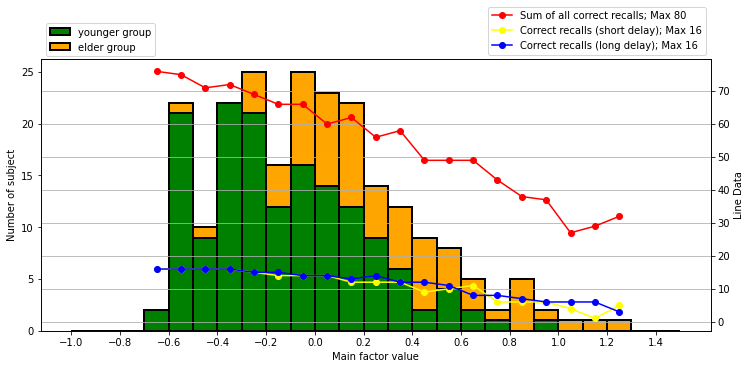

In [36]:
# 度数分布表  of pd

bins = np.linspace(-1, 1.5, 26)
scores = pd.Series(X_pca.T[0])
freq = scores.value_counts(bins=bins, sort=False)
class_value = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq = freq / scores.count()  # 相対度数
cum_freq = freq.cumsum()  # 累積度数
rel_cum_freq = rel_freq.cumsum()  # 相対累積度数

scores20 = pd.Series(under20)
freq20 = scores20.value_counts(bins=bins, sort=False)
class_value20 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq20 = freq20 / scores20.count()  # 相対度数
cum_freq20 = freq20.cumsum()  # 累積度数
rel_cum_freq20 = rel_freq20.cumsum()  # 相対累積度数

scores50 = pd.Series(over50)
freq50 = scores50.value_counts(bins=bins, sort=False)
class_value50 = [round(i, 2) for i in (bins[:-1] + bins[1:]) / 2]  # 階級値
rel_freq50 = freq50 / scores50.count()  # 相対度数
cum_freq50 = freq50.cumsum()  # 累積度数
rel_cum_freq50 = rel_freq50.cumsum()  # 相対累積度数

dist = pd.DataFrame(
    {
        "階級値": class_value,
        "度数": freq,
        "相対度数": rel_freq,
        "累積度数": cum_freq,
        "相対累積度数": rel_cum_freq,
    },
    index=freq.index
)

fig, ax = plt.subplots(figsize=[12,5])

ax.bar(class_value20, freq20, color="green", ec="k", width=0.1, lw=2, label='younger group')
ax.bar(class_value50, freq50, color="orange", ec="k", width=0.1, lw=2, bottom=freq20, label='elder group')
ax.set_ylabel('Number of subject')
ax.set_xlabel('Main factor value')
ax.set_xticks(np.arange(-1, 1.5, 0.2))
ax.legend(bbox_to_anchor=(0, 1.15), loc='upper left')

ax2 = ax.twinx()
ax2.plot(class_value20, bin_means_CVLT_6, marker='o', color='red', linestyle='-', label='Sum of all correct recalls; Max 80')
ax2.plot(class_value20, bin_means_CVLT_9, marker='o', color='yellow', linestyle='-', label='Correct recalls (short delay); Max 16')
ax2.plot(class_value20, bin_means_CVLT_11, marker='o', color='blue', linestyle='-', label='Correct recalls (long delay); Max 16')
ax2.legend(bbox_to_anchor=(1, 1.21), loc='upper right')
ax2.set_ylabel('Line Data')
plt.grid()
plt.show()

In [45]:
cog_df2

,ID,Label,Age_1,CVLT,CVLT_6,CVLT_bins,CVLT_9,CVLT_11
0,sub-032311,0.0,20,-0.371043,60.0,"(-0.4, -0.3]",16,16.0
1,sub-032309,2.0,20,0.160211,53.0,"(0.1, 0.2]",11,11.0
2,sub-032382,0.0,25,0.182326,48.0,"(0.1, 0.2]",11,12.0
3,sub-032302,0.0,20,-0.298945,63.0,"(-0.3, -0.2]",15,15.0
4,sub-032315,0.0,20,0.130786,53.0,"(0.1, 0.2]",11,12.0
...,...,...,...,...,...,...,...,...
222,sub-032304,1.0,25,0.786817,43.0,"(0.7, 0.8]",3,7.0
223,sub-032439,0.0,20,-0.287718,62.0,"(-0.3, -0.2]",15,14.0
224,sub-032440,0.0,25,-0.536070,72.0,"(-0.6, -0.5]",16,16.0
225,sub-032441,2.0,25,0.555243,49.0,"(0.5, 0.6]",10,8.0


In [46]:
cog_df2.to_csv('memory.csv')

In [55]:
Meta = pd.read_csv('/workspace/brail_poc3/experiments/Behavioural_Data_MPILMBB_LEMON/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv')
Meta
# Meta.shape[0]

,Subject,Gender_ 1=female_2=male,Age,Handedness,Education,DRUG,DRUG_0=negative_1=Positive,Unnamed: 7,Smoking,"Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)",...,SKID_Diagnoses 1,SKID_Diagnoses 2,Comments_SKID_assessment,Hamilton_Scale,BSL23_sumscore,BSL23_behavior,AUDIT,Standard_Alcoholunits_Last_28days,Alcohol_Dependence_In_1st-3rd_Degree_relative,Relationship_Status
0,sub-032311,2,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,47,No,No
1,sub-032309,2,20-25,right,Gymnasium,negative,0,NaN,occasional smoker,2.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,NaN,NaN,12.0,45,Yes,Yes
2,sub-032382,2,25-30,right,Gymnasium,negative,0,NaN,occasional smoker,2.0,...,NaN,NaN,NaN,2.0,NaN,NaN,0.0,12,unknown,Yes
3,sub-032302,1,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,3.0,NaN,NaN,1.0,0,No,No
4,sub-032315,2,20-25,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,2.0,NaN,NaN,7.0,22,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,sub-032304,2,25-30,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,0.0,4.0,0.0,1.0,1,No,No
224,sub-032439,2,20-25,left,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,"suspected diagnosis: panic disorder, alcohol a...",1.0,4.0,1.0,5.0,18,no,no
225,sub-032440,2,25-30,left,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:V71.09 #DESC:No Diagnosis or Condition ...,NaN,NaN,5.0,2.0,1.0,3.0,29,no,yes
226,sub-032441,2,25-30,right,Gymnasium,negative,0,NaN,non-smoker,1.0,...,#CODE:300.29 #DESC: Mild Specific phobia #SPEC...,NaN,subclinical specific phobia,3.0,3.0,1.0,3.0,"16,5",no,yes


In [58]:
CogTestBatDic = []
for i in range(Meta.shape[0]):
    TempDic = {}
    TempDic['SubNum'] = Meta['Subject'][i] # ID追加, SubNum
    
    for index_j, j in enumerate(CogTestBat):
        
    
    CogTestBatDic.append(TempDic)
CogTestBatDic

[{'SubNum': 'sub-032311'},
 {'SubNum': 'sub-032309'},
 {'SubNum': 'sub-032382'},
 {'SubNum': 'sub-032302'},
 {'SubNum': 'sub-032315'},
 {'SubNum': 'sub-032314'},
 {'SubNum': 'sub-032316'},
 {'SubNum': 'sub-032383'},
 {'SubNum': 'sub-032307'},
 {'SubNum': 'sub-032310'},
 {'SubNum': 'sub-032312'},
 {'SubNum': 'sub-032317'},
 {'SubNum': 'sub-032404'},
 {'SubNum': 'sub-032318'},
 {'SubNum': 'sub-032319'},
 {'SubNum': 'sub-032386'},
 {'SubNum': 'sub-032320'},
 {'SubNum': 'sub-032321'},
 {'SubNum': 'sub-032322'},
 {'SubNum': 'sub-032394'},
 {'SubNum': 'sub-032324'},
 {'SubNum': 'sub-032323'},
 {'SubNum': 'sub-032528'},
 {'SubNum': 'sub-032325'},
 {'SubNum': 'sub-032313'},
 {'SubNum': 'sub-032405'},
 {'SubNum': 'sub-032384'},
 {'SubNum': 'sub-032407'},
 {'SubNum': 'sub-032327'},
 {'SubNum': 'sub-032414'},
 {'SubNum': 'sub-032418'},
 {'SubNum': 'sub-032326'},
 {'SubNum': 'sub-032415'},
 {'SubNum': 'sub-032332'},
 {'SubNum': 'sub-032331'},
 {'SubNum': 'sub-032305'},
 {'SubNum': 'sub-032308'},
 